## 🌟 Non Twist

In [28]:
function MapeoX(x,y,a,b)
    vx = x+a*(1-(y-b*sin(2*pi*x))^2)
    return vx
end

function MapeoY(x,y,a,b)
    vy = y-b*sin(2*pi*x)
    return vy
end

MapeoY (generic function with 1 method)

In [2]:
a = 1.5
b = 0.0

0.0

In [29]:
simetria1(y)= 0.0
simetria2(y)=(a*(1-y^2))/2

simetria2 (generic function with 1 method)

In [4]:
push!(LOAD_PATH,"/home/eve/Documents/Matematicas/Proyectos/Implementacion")

4-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "/home/eve/Documents/Matematicas/Proyectos/Implementacion"

In [5]:
using PeriodicosSymmetries

In [6]:
using Plots

Queremos ahora filtrar los puntos que si son periodicos de los que no. 
* buscamos puntos de periodo dos y para  comprobra que son de periodo dos los vamos a iterar si regresan al mismo salvo un erro numérico entonces los consideramos si no, los desechamos. 

In [30]:
PuntosP2 =PeriodicosS(MapeoX,MapeoY,simetria2,a,b,2,[-4,4])

2-element Array{Array{Float64,1},1}:
 [-0.3333333333333333, 0.3333333333333333, 0.3333333333333333, -0.3333333333333333, 0.75]
 [-1.2018504251546631, -0.7453559924999299, 0.7453559924999299, 1.2018504251546631, 0.0]

In [268]:
mod(10,1)

0

In [19]:
Mapeo(x,y)=[MapeoX(x,y,a,b),MapeoY(x,y,a,b)]

Mapeo (generic function with 1 method)

In [31]:
function MapeoIterador(p,n)
    lista1 = []
    lista2 = []
    #p = [PuntosP3[1][1][2],PuntosP3[2][1][2]]
    append!(lista1,p[1])
    append!(lista2,p[2])
    for i in 1:n
        p = Mapeo(p[1],p[2])
#          if p[1] >= 1/2 
#              p[1] = mod(p[1],1/2)-1/2
#          else
#              p[1] = 1/2-mod(p[1],1/2)
#          end
        append!(lista1,p[1])
        append!(lista2,p[2])
    end
   # lista1=[mod(lista1[i],1) for i in 1:length(lista1)]
    distanciaX = []
    distanciaY = []
    for i in 2:n
        append!(distanciaX, lista1[i-1]-lista1[i])
        append!(distanciaY, lista1[i-1]-lista1[i])
    end
    return [lista1,lista2]
end

MapeoIterador (generic function with 1 method)

In [36]:
puntop2 =[PuntosP2[1][1],PuntosP2[2][1]]

2-element Array{Float64,1}:
 -0.3333333333333333
 -1.2018504251546631

In [33]:
MapeoIterador(puntop2,7)[1]

8-element Array{Any,1}:
 -0.3333333333333333
 -1.0
 -1.6666666666666665
 -2.333333333333333
 -2.9999999999999996
 -3.666666666666666
 -4.333333333333333
 -5.0

In [34]:
MapeoIterador(puntop2,7)[2]

8-element Array{Any,1}:
 -1.2018504251546631
 -1.2018504251546631
 -1.2018504251546631
 -1.2018504251546631
 -1.2018504251546631
 -1.2018504251546631
 -1.2018504251546631
 -1.2018504251546631

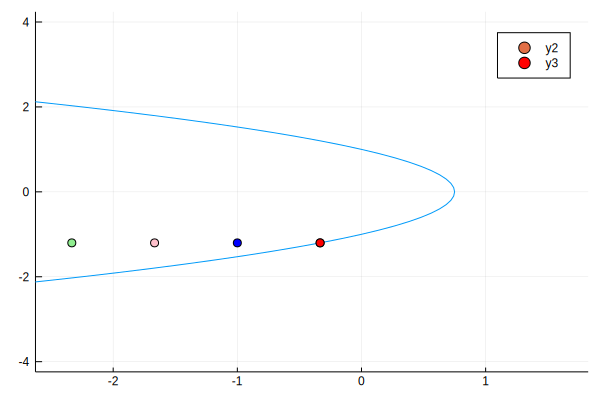

In [35]:
listaY = [y for y in -4.0:0.1:4.0]
#listaX = [mod((a/2)*(1-y^2),1)-1.0 if (a/2)*(1-y^2)<0  else  mod((a/2)*(1-y^2),1)+1.0 for y in listaY]
listaX = [(a/2)*(1-y^2) for y in listaY]
plot(listaX, listaY, label = "", xlim=[-2.5,1.7])
scatter!([PuntosP2[1][1]],[PuntosP2[2][1]])
scatter!(MapeoIterador(puntop2,7)[1],MapeoIterador(puntop2,7)[2], color=["red","blue","pink","lightgreen"])

In [193]:
-1.666+2/2

-0.6659999999999999

In [18]:

PuntosP3 =PeriodicosS(MapeoX,MapeoY,simetria2,a,b,3,[-4.0,4.0])
PuntosP4 =PeriodicosS(MapeoX,MapeoY,simetria2,a,b,4,[-4.0,4.0])
PuntosP5 =PeriodicosS(MapeoX,MapeoY,simetria2,a,b,5,[-4.0,4.0])
PuntosP6 =PeriodicosS(MapeoX,MapeoY,simetria2,a,b,6,[-4.0,4.0])

ArgumentError: ArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.



In [73]:
listaY = [y for y in -4.0:0.1:4.0]
listaX = [(a/2)*(1-y^2) for y in listaY]
plot(listaX, listaY, label = "")
ListaX1 = [PuntosP2[1][1],PuntosP2[1][2],PuntosP3[1][1],PuntosP3[1][2],PuntosP4[1][1],PuntosP4[1][2],
        PuntosP5[1][1],PuntosP5[1][2], PuntosP6[1][1],PuntosP6[1][2]]
ListaY1 = [PuntosP2[2][1],PuntosP2[2][2],PuntosP3[2][1],PuntosP3[2][2],PuntosP4[2][1],PuntosP4[2][2],
        PuntosP5[2][1],PuntosP5[2][2], PuntosP6[2][1],PuntosP6[2][2]]
scatter!(ListaX1 ,ListaY1,
    label = "");

* queremos ver si los puntos son de periodo n o si son de periodo menor a n. Para ello debemos ver si 
$$f^{k}(x)=x$$ 
con $k<n$

In [110]:
MapeosN = substitutionMap(MapeoX,MapeoY,a,b,simetria2)

2-element Array{Function,1}:
 PeriodicosSymmetries.var"#MapeoXA#3"{typeof(MapeoX),Float64,Float64,typeof(simetria2)}(MapeoX, 0.7, 0.7, simetria2)
 PeriodicosSymmetries.var"#MapeoYA#4"{typeof(MapeoY),Float64,Float64,typeof(simetria2)}(MapeoY, 0.7, 0.7, simetria2)

Mapeo (generic function with 1 method)

In [130]:
PuntosP2[2][1]


10-element Array{Float64,1}:
 -1.5494906543727887
 -1.5186113897475038
 -1.4646263460920963
  1.065965592810996
  1.1259721329833228
  1.167866113699762
  1.5754173593553793
  1.6405437631691588
  1.8088687475051477
  1.8593710911098909

In [139]:
lista1 = []
lista2 = []
p = [PuntosP2[1][1][5],PuntosP2[2][1][5]]
append!(lista1,p[1])
append!(lista2,p[2])
for i in 1:40
    p = Mapeo(p[1],p[2])
    append!(lista1,p[1])
    append!(lista2,p[2])
end
   
lista1=[mod(lista1[i],1) for i in 1:length(lista1)];

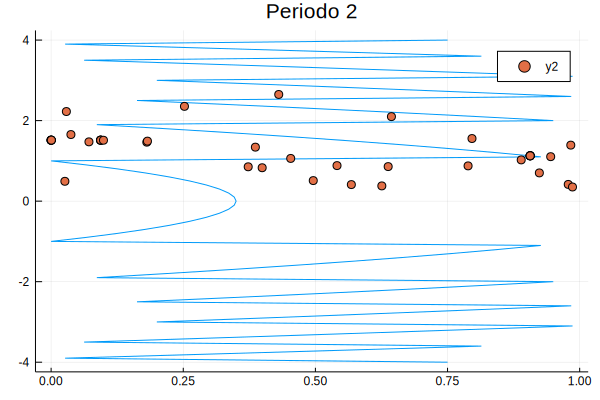

In [140]:
listaY = [y for y in -4.0:0.1:4.0]
listaX = [mod((a/2)*(1-y^2),1) for y in listaY]
plot(listaX, listaY, label = "", title = "Periodo 2")
scatter!(lista1,lista2)

In [41]:
lista1 = []
lista2 = []
p = [PuntosP2[1][2][2],PuntosP2[2][2][2]]
append!(lista1,p[1])
append!(lista2,p[2])
for i in 1:20
    p = Mapeo(p[1],p[2])
    append!(lista1,p[1])
    append!(lista2,p[2])
end
   
lista1=[mod(lista1[i],1) for i in 1:length(lista1)];

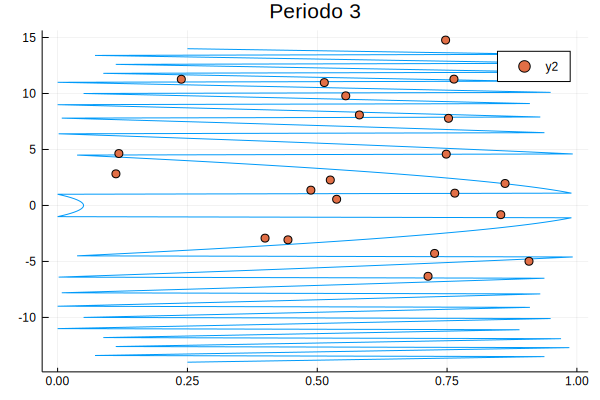

In [42]:
listaY = [y for y in -14.0:0.1:14.0]
listaX = [mod((0.1/2)*(1-y^2),1) for y in listaY]
plot(listaX, listaY, label = "", title = "Periodo 3")
scatter!(lista1,lista2)

In [43]:
lista1 = []
lista2 = []
p = [PuntosP2[2][2][1],PuntosP2[2][2][1]]
append!(lista1,p[1])
append!(lista2,p[2])
for i in 1:20
    p = Mapeo(p[1],p[2])
    append!(lista1,p[1])
    append!(lista2,p[2])
end
   
lista1=[mod(lista1[i],1) for i in 1:length(lista1)];

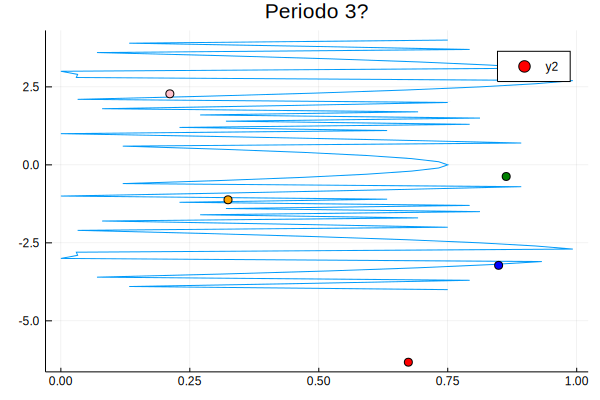

In [44]:
listaY = [y for y in -4.0:0.1:4.0]
listaX = [mod((a/2)*(1-y^2),1) for y in listaY]
plot(listaX, listaY, label = "", title = "Periodo 3?")
scatter!(lista1[1:5],lista2[1:5], color = ["red","blue", "green", "pink","orange", "black"])

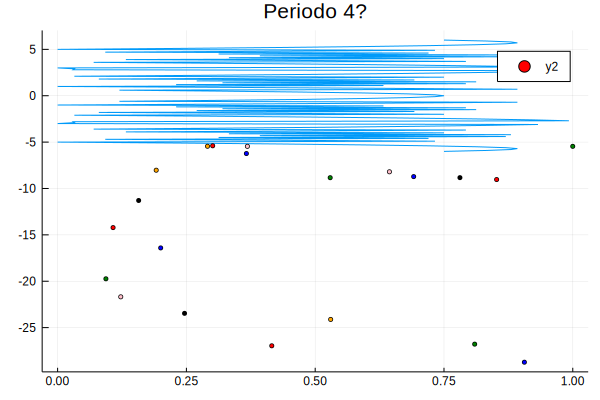

In [45]:
lista1 = []
lista2 = []
p = [PuntosP3[1][2][1],PuntosP3[2][2][1]]
append!(lista1,p[1])
append!(lista2,p[2])
for i in 1:20
    p = Mapeo(p[1],p[2])
    append!(lista1,p[1])
    append!(lista2,p[2])
end
   
lista1=[mod(lista1[i],1) for i in 1:length(lista1)];
listaY = [y for y in -6.0:0.1:6.0]
listaX = [mod((a/2)*(1-y^2),1) for y in listaY]
plot(listaX, listaY, label = "", title = "Periodo 4?")
scatter!(lista1,lista2, color = ["red","blue", "green", "pink","orange", "black"], ms =2.0 )

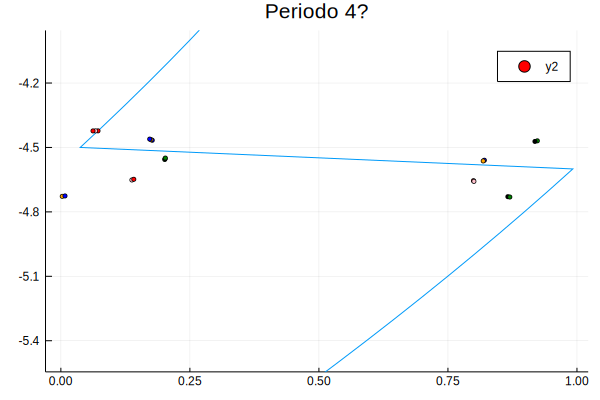

In [99]:
plot(listaX, listaY, label = "", title = "Periodo 4?")
scatter!(lista1,lista2, color = ["red","blue", "green", "pink","orange", "black"], ms =2.0, ylim=[-5.5,-4.0] )

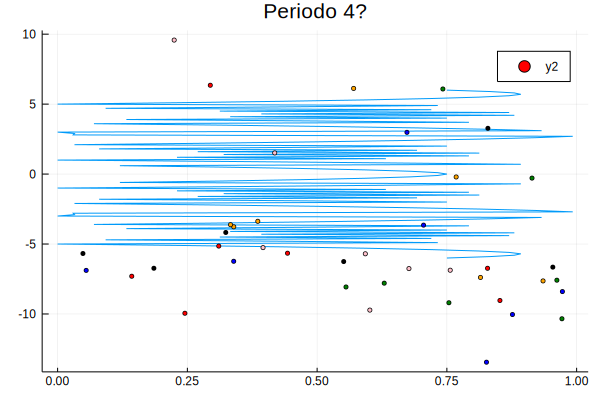

In [47]:
lista1 = []
lista2 = []
p = [PuntosP3[1][2][2],PuntosP3[2][2][2]]
append!(lista1,p[1])
append!(lista2,p[2])
for i in 1:40
    p = Mapeo(p[1],p[2])
    append!(lista1,p[1])
    append!(lista2,p[2])
end
   
lista1=[mod(lista1[i],1) for i in 1:length(lista1)];
listaY = [y for y in -6.0:0.1:6.0]
listaX = [mod((a/2)*(1-y^2),1) for y in listaY]
plot(listaX, listaY, label = "", title = "Periodo 4?")
scatter!(lista1,lista2, color = ["red","blue", "green", "pink","orange", "black"], ms =2.0 )

In [48]:
function MapeoIterador(p,n)
    lista1 = []
    lista2 = []
    #p = [PuntosP3[1][1][2],PuntosP3[2][1][2]]
    append!(lista1,p[1])
    append!(lista2,p[2])
    for i in 1:30
        p = Mapeo(p[1],p[2])
        append!(lista1,p[1])
        append!(lista2,p[2])
    end
    lista1=[mod(lista1[i],1) for i in 1:length(lista1)]
    return [lista1,lista2]
end

MapeoIterador (generic function with 1 method)

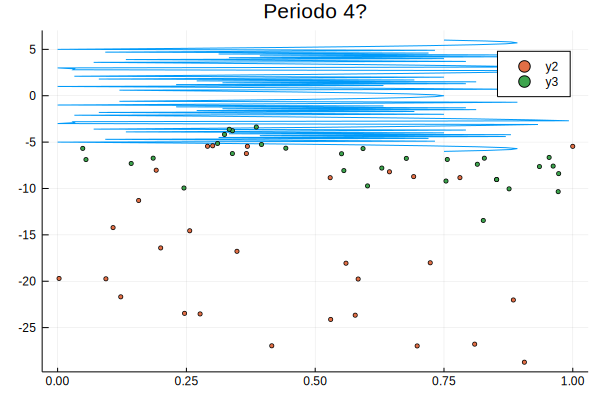

In [49]:
plot(listaX, listaY, label = "", title = "Periodo 4?")
scatter!(MapeoIterador([PuntosP3[1][2][1],PuntosP3[2][2][1]],20)[1],
    MapeoIterador([PuntosP3[1][2][1],PuntosP3[2][2][1]],20)[2], ms =2.0)
scatter!(MapeoIterador([PuntosP3[1][2][2],PuntosP3[2][2][2]],20)[1],
    MapeoIterador([PuntosP3[1][2][2],PuntosP3[2][2][2]],20)[2], ms =2.0)

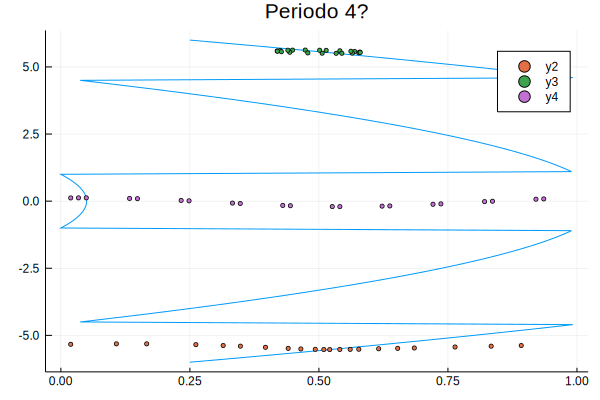

In [110]:
plot(listaX, listaY, label = "", title = "Periodo 4?")
scatter!(MapeoIterador([PuntosP4[1][1][1],PuntosP4[2][1][1]],20)[1],
    MapeoIterador([PuntosP4[1][1][1],PuntosP4[2][1][1]],20)[2], ms =2.0)
scatter!(MapeoIterador([PuntosP4[1][1][2],PuntosP4[2][1][2]],20)[1],
    MapeoIterador([PuntosP4[1][1][2],PuntosP4[2][1][2]],20)[2], ms =2.0)
scatter!(MapeoIterador([PuntosP4[1][2][1],PuntosP4[2][2][1]],20)[1],
    MapeoIterador([PuntosP4[1][2][1],PuntosP4[2][2][1]],20)[2], ms =2.0)

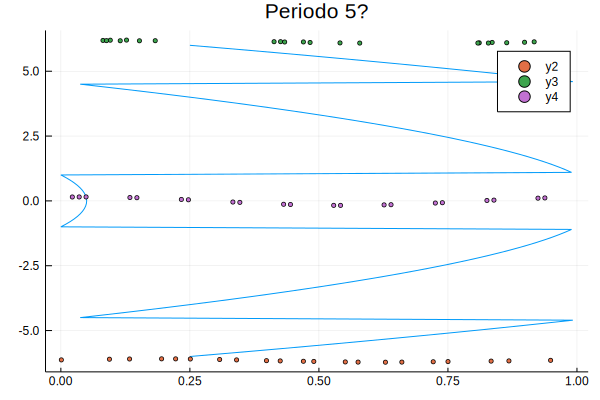

In [111]:
plot(listaX, listaY, label = "", title = "Periodo 5?")
scatter!(MapeoIterador([PuntosP5[1][1][1],PuntosP5[2][1][1]],20)[1],
    MapeoIterador([PuntosP5[1][1][1],PuntosP5[2][1][1]],20)[2], ms =2.0)
scatter!(MapeoIterador([PuntosP5[1][1][2],PuntosP5[2][1][2]],20)[1],
    MapeoIterador([PuntosP5[1][1][2],PuntosP5[2][1][2]],20)[2], ms =2.0)
scatter!(MapeoIterador([PuntosP5[1][2][1],PuntosP5[2][2][1]],20)[1],
    MapeoIterador([PuntosP5[1][2][1],PuntosP5[2][2][1]],20)[2], ms =2.0)

In [114]:
PuntosP20 =PeriodicosS(MapeoX,MapeoY,simetria2,a,b,20,[-5.0,5.0])

2-element Array{Array{Array{Float64,1},1},1}:
 [[], [0.035019698851920855]]
 [[], [0.547362789164173]]

In [50]:
?BigFloat

search: BigFloat



```
BigFloat <: AbstractFloat
```

Arbitrary precision floating point number type.

---

```
BigFloat(x::Union{Real, AbstractString} [, rounding::RoundingMode=rounding(BigFloat)]; [precision::Integer=precision(BigFloat)])
```

Create an arbitrary precision floating point number from `x`, with precision `precision`. The `rounding` argument specifies the direction in which the result should be rounded if the conversion cannot be done exactly. If not provided, these are set by the current global values.

`BigFloat(x::Real)` is the same as `convert(BigFloat,x)`, except if `x` itself is already `BigFloat`, in which case it will return a value with the precision set to the current global precision; `convert` will always return `x`.

`BigFloat(x::AbstractString)` is identical to [`parse`](@ref). This is provided for convenience since decimal literals are converted to `Float64` when parsed, so `BigFloat(2.1)` may not yield what you expect.

!!! compat "Julia 1.1"
    `precision` as a keyword argument requires at least Julia 1.1. In Julia 1.0 `precision` is the second positional argument (`BigFloat(x, precision)`).


# Examples

```jldoctest
julia> BigFloat(2.1) # 2.1 here is a Float64
2.100000000000000088817841970012523233890533447265625

julia> BigFloat("2.1") # the closest BigFloat to 2.1
2.099999999999999999999999999999999999999999999999999999999999999999999999999986

julia> BigFloat("2.1", RoundUp)
2.100000000000000000000000000000000000000000000000000000000000000000000000000021

julia> BigFloat("2.1", RoundUp, precision=128)
2.100000000000000000000000000000000000007
```

# See also

  * [`@big_str`](@ref)
  * [`rounding`](@ref) and [`setrounding`](@ref)
  * [`precision`](@ref) and [`setprecision`](@ref)


In [4]:
precision(BigFloat(0.1,80,))

80

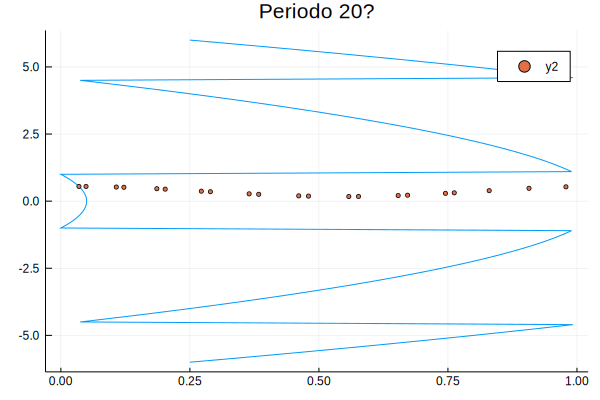

In [116]:
plot(listaX, listaY, label = "", title = "Periodo 20?")
scatter!(MapeoIterador([PuntosP20[1][2][1],PuntosP20[2][2][1]],20)[1],
    MapeoIterador([PuntosP20[1][2][1],PuntosP20[2][2][1]],20)[2], ms =2.0)